In [42]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/PhD/MatrixProductBP.jl`


In [43]:
using JLD2, Plots, Statistics, LaTeXStrings, MatrixProductBP, Tullio
using UnPack: @unpack
blue = palette(:tab10)[1]
orange = palette(:tab10)[2]
green = palette(:tab10)[3]
red = palette(:tab10)[4]
brown = "#b75e00"
beige = "#efe7dd"
beige2 = "#f2f1ec"
cyan = "#289dd2"
;

## Random tree (preferential attachment) with random couplings

In [44]:
N = 10
D = load("./tree_$(N)_beta0,5_h0,1_randomJ.jld2")
m_fourier = D["m_fourier"]
energy_fourier = D["energy_fourier"]
J = D["J"]

nsamp = [10^5, 10^6]
m_mc = []
energy_mc = []
for n in nsamp
    D = load("./monte_carlo_tree_$(N)_disordered_posneg_beta0,5_Nmc$(N)_nsamp$(n).jld2")
    push!(m_mc, D["m_mc"])
    # σ_mc = D["σ_mc"]
    # push!(autocorr_mc, D["autocorr_mc"])
    # σ_autocorr_mc = D["σ_autocorr_mc"]
    push!(energy_mc, D["energy_mc"])
    # σ_energy_mc = D["σ_energy_mc"]
end

col = cgrad(:darktest, length(nsamp), categorical=true)

T = length(m_fourier) - 1
;

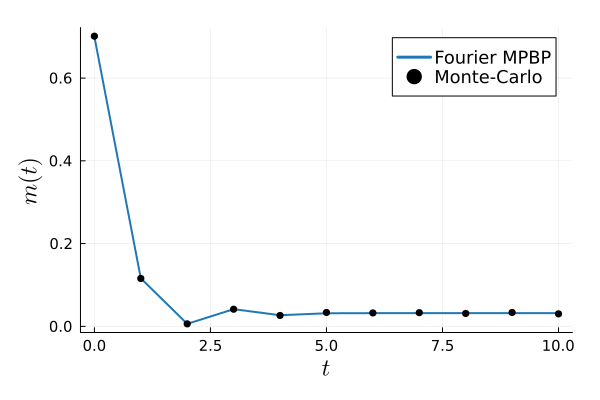

In [45]:
i = 2
y_mc = m_mc[end][i]
# err_mc = σ_mc[i]
y_fourier = m_fourier[i]

T = length(y_fourier) - 1
plba = plot(legend=:topright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,400),
            xlabel=L"t",
            ylabel=L"m(t)")

plot!(plba, 0:T, y_fourier[1:end], color=blue, lw=2, label="Fourier MPBP")
plot!(plba, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:dot, label="Monte-Carlo")

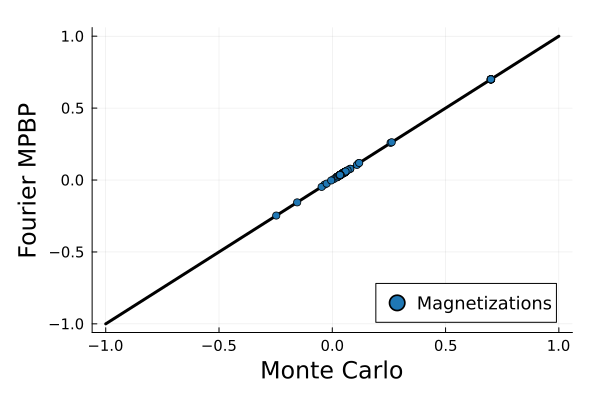

In [46]:
y_fourier_sc = reduce(vcat, y for y in m_fourier)
y_mc_sc = reduce(vcat, y for y in m_mc[end])
pl2ba = plot(legend=:bottomright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,400),
            xlabel="Monte Carlo",
            ylabel="Fourier MPBP")

plot!(pl2ba, -1.0:0.1:1.0, -1.0:0.1:1.0, label="", c=:black, lw=3)
plot!(pl2ba, y_mc_sc, y_fourier_sc, st=:scatter, markerstrokecolor=:black, color=blue, label="Magnetizations")

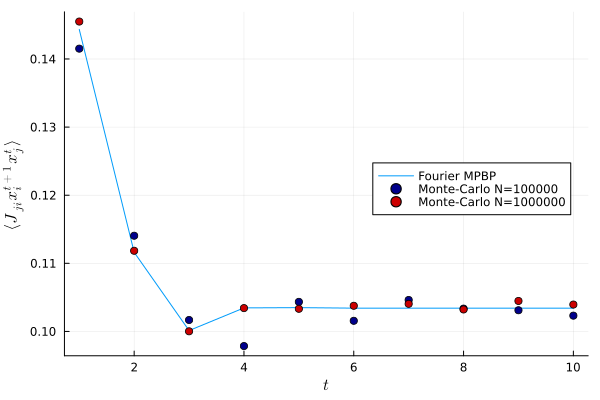

In [47]:
i,j = 2,3

plot(energy_fourier[i,j,:]; xlabel=L"t", ylabel=L"\langle J_{ji} x_i^{t+1} x_j^t \rangle", label="Fourier MPBP", legend=:right)#, ylims=(0,1))

for (k,N) in enumerate(nsamp)
    plot!(energy_mc[k][i,j]; label="Monte-Carlo N=$N", st=:scatter, marker=:dot, color=col[k])
end

plot!()

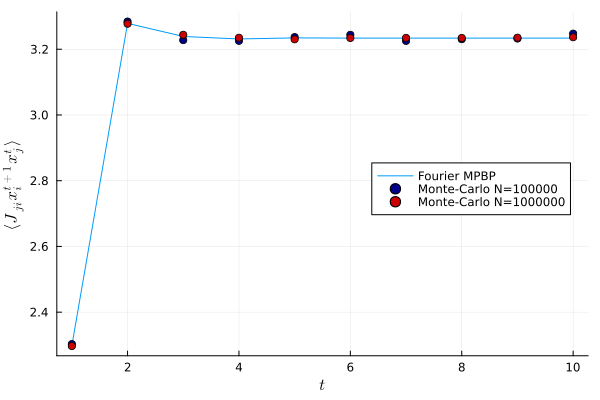

In [48]:
E_fourier = sum(energy_fourier[i,j,:] for i=1:N, j=1:N)
E_mc = []
for en_mc in energy_mc
    push!(E_mc, sum(en_mc[i,j] for i=1:N, j=1:N))
end

plot(E_fourier; xlabel=L"t", ylabel=L"\langle J_{ji} x_i^{t+1} x_j^t \rangle", label="Fourier MPBP", legend=:right)#, ylims=(0,1))

for (k,N) in enumerate(nsamp)
    plot!(E_mc[k]; label="Monte-Carlo N=$N", st=:scatter, marker=:dot, color=col[k])
end

plot!()

## Barabasi-Albert with random $J$

In [49]:
D = load("./tree_100_beta0,5_h0,1_randomJ.jld2")
m_fourier = D["m_fourier"]
m_mc = D["m_mc"]
σ_mc = D["σ_mc"];

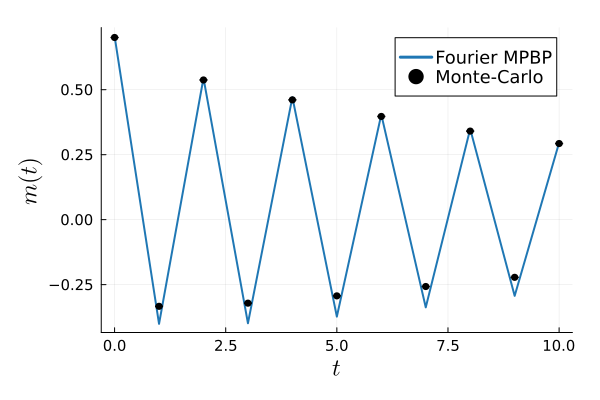

In [50]:
i = 2
y_mc = m_mc[i]
err_mc = σ_mc[i]
y_fourier = m_fourier[i]

T = length(y_fourier) - 1
plba = plot(legend=:topright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,400),
            xlabel=L"t",
            ylabel=L"m(t)")

plot!(plba, 0:T, y_fourier[1:end], color=blue, lw=2, label="Fourier MPBP")
plot!(plba, 0:T, y_mc[1:end], yerr=err_mc, c=:black, st=:scatter, marker=:dot, label="Monte-Carlo")

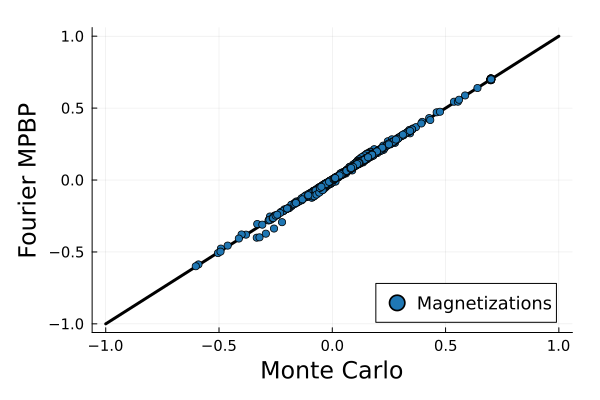

In [51]:
y_fourier_sc = reduce(vcat, y for y in m_fourier)
y_mc_sc = reduce(vcat, y for y in m_mc)
pl2ba = plot(legend=:bottomright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,400),
            xlabel="Monte Carlo",
            ylabel="Fourier MPBP")

plot!(pl2ba, -1.0:0.1:1.0, -1.0:0.1:1.0, label="", c=:black, lw=3)
plot!(pl2ba, y_mc_sc, y_fourier_sc, st=:scatter, markerstrokecolor=:black, color=blue, label="Magnetizations")

## Infinite regular graph with random couplings

In [52]:
D = load("./popdyn_infinite_8-reg_disordered_posneg_beta0,3_dmax15_light.jld2")

beliefs = D["bs"]
beliefs2times = D["bs2times"]
beliefs2vars = D["bs2vars"]


Nmc = 5*10^3
nsamp = [10^4, 10^5, 10^6]
m_mc = []
autocorr_mc = []
energy_mc = []
for n in nsamp
    D = load("./monte_carlo_infinite_8-reg_disordered_posneg_beta0,3_Nmc$(Nmc)_nsamp$(n).jld2")
    push!(m_mc, D["m_mc"])
    # σ_mc = D["σ_mc"]
    push!(autocorr_mc, D["autocorr_mc"])
    # σ_autocorr_mc = D["σ_autocorr_mc"]
    push!(energy_mc, D["energy_mc"])
    # σ_energy_mc = D["σ_energy_mc"]
end

T = length(beliefs[1]) - 1
;

In [53]:
import MatrixProductBP.Models: potts2spin
ns = 300
range = length(beliefs)+1-min(ns, length(beliefs)):length(beliefs)
ms = [expectation.(potts2spin, b) for b in beliefs[range]]
m_fourier = mean(ms)
σ_fourier = std(ms) ./ sqrt(length(ms))

rs = [expectation.(potts2spin, btu) for btu in beliefs2times[range]]
cs = MatrixProductBP.covariance.(rs, ms)
c_avg = mean(abs.(x) for x in cs)
c_std = std(cs) ./ sqrt(length(cs))

degree = 8
ns2vars = ns * degree
range = length(beliefs2vars)+1-min(ns2vars, length(beliefs2vars)):length(beliefs2vars)
c2s = []
for X in @view beliefs2vars[range]
    Jⱼᵢ = X[2]
    push!(c2s, Jⱼᵢ.*expectation.(potts2spin, X[1]))
end
c2_avg = mean(c2s)
;

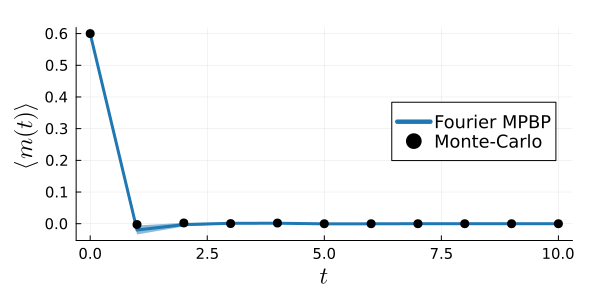

In [54]:
y_mc = m_mc[end]
y_fourier = m_fourier

T = length(y_fourier) - 1
plrr = plot(legend=:right, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,300),
            xlabel=L"t",
            ylabel=L"\langle m(t) \rangle")

plot!(plrr, 0:T, y_fourier[1:end], color=blue, ribbon=σ_fourier, lw=3, label="Fourier MPBP")
plot!(plrr, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:dot, markersize=5, label="Monte-Carlo")
display(plrr)

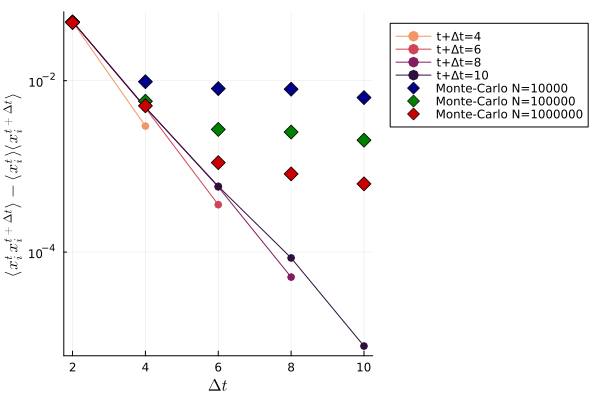

In [55]:
plot_autocovs(args...; kw...) = plot_autocovs!(plot(), args...; kw...)
function plot_autocovs!(pl, c; skip_even=false, T=size(c,1)-1, us = 0:(2*floor(Int, T/10)):T, kw...)
    step = skip_even ? 2 : 1
    cg = cgrad(:matter, length(us)+1, categorical=true)
    ylabel = L"\langle x_{i}^t x_{i}^{t+\Delta t}\rangle-" * 
        L"\langle x_{i}^t\rangle\langle x_{i}^{t+\Delta t}\rangle"
    xlabel = L"\Delta t"
    plot!(pl; xlabel, ylabel, legend=:outertopright)
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[1:step:u,u+1], label="t+Δt=$u", c=cg[j+1], msc=:auto; kw...) 
    end
    pl
end
plot_autocovs(c_avg; skip_even=true, m=:o, us=4:2:T, yaxis=:log)

col = cgrad(:darktest, length(nsamp), categorical=true)
for (k,N) in enumerate(nsamp)
    plot!(T:-2:2, autocorr_mc[k][1:2:end-1], st=:scatter, marker=:diamond, color=col[k], markersize=7, label="Monte-Carlo N=$N")
end

plot!()
# plot_autocovs(c_avg; skip_even=false, m=:o, us=4:2:T)
# plot!(T:-1:2, autocorr_mc[1:1:end-1], st=:scatter, marker=:diamond, color=:black, markersize=7, label="Monte-Carlo")

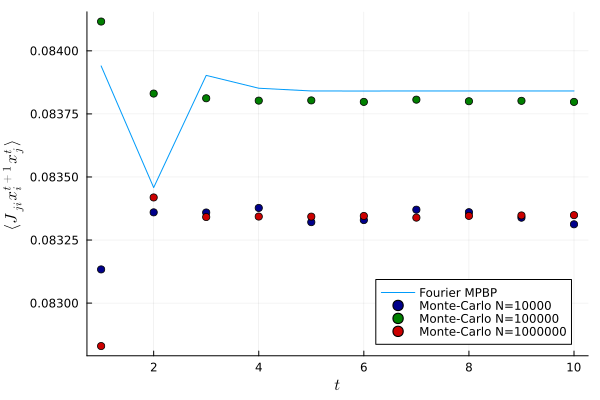

In [56]:
plot(c2_avg; xlabel=L"t", ylabel=L"\langle J_{ji} x_i^{t+1} x_j^t \rangle", label="Fourier MPBP")#, ylims=(0,1))

for (k,N) in enumerate(nsamp)
    plot!(energy_mc[k]; label="Monte-Carlo N=$N", st=:scatter, marker=:dot, color=col[k])
end

plot!()

## Infinite Erdős-Rényi graph with random couplings

In [57]:
D = load("./popdyn_infinite_er_disordered_posneg_beta0,5_dmax15_K60_light.jld2")

beliefs = D["bs"]
beliefs2times = D["bs2times"]
beliefs2vars = D["bs2vars"]


Nmc = 5*10^3
# nsamp = [10^4, 10^5]
nsamp = [10^4, 10^5, 10^6]
m_mc = []
autocorr_mc = []
energy_mc = []
for n in nsamp
    D = load("./monte_carlo_infinite_er_disordered_posneg_beta0,5_Nmc$(Nmc)_nsamp$(n).jld2")
    push!(m_mc, D["m_mc"])
    # σ_mc = D["σ_mc"]
    push!(autocorr_mc, D["autocorr_mc"])
    # σ_autocorr_mc = D["σ_autocorr_mc"]
    push!(energy_mc, D["energy_mc"])
    # σ_energy_mc = D["σ_energy_mc"]
end

T = length(beliefs[1]) - 1
;

In [58]:
import MatrixProductBP.Models: potts2spin
ns = 400
range = length(beliefs)+1-min(ns, length(beliefs)):length(beliefs)
ms = [expectation.(potts2spin, b) for b in beliefs[range]]
m_fourier = mean(ms)
σ_fourier = std(ms) ./ sqrt(length(ms))

rs = [expectation.(potts2spin, btu) for btu in beliefs2times[range]]
cs = MatrixProductBP.covariance.(rs, ms)
c_avg = mean(abs.(x) for x in cs)
c_std = std(cs) ./ sqrt(length(cs))

degree = 4
ns2vars = ns * degree
range = length(beliefs2vars)+1-min(ns2vars, length(beliefs2vars)):length(beliefs2vars)
c2s = []
for X in @view beliefs2vars[range]
    Jⱼᵢ = X[2]
    push!(c2s, Jⱼᵢ.*expectation.(potts2spin, X[1]))
end
c2_avg = mean(c2s)
;

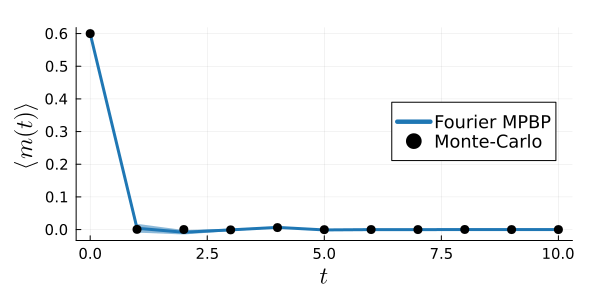

In [59]:
y_mc = m_mc[end]
y_fourier = m_fourier

T = length(y_fourier) - 1
plrr = plot(legend=:right, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,300),
            xlabel=L"t",
            ylabel=L"\langle m(t) \rangle")

plot!(plrr, 0:T, y_fourier[1:end], color=blue, ribbon=σ_fourier, lw=3, label="Fourier MPBP")
plot!(plrr, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:dot, markersize=5, label="Monte-Carlo")
display(plrr)

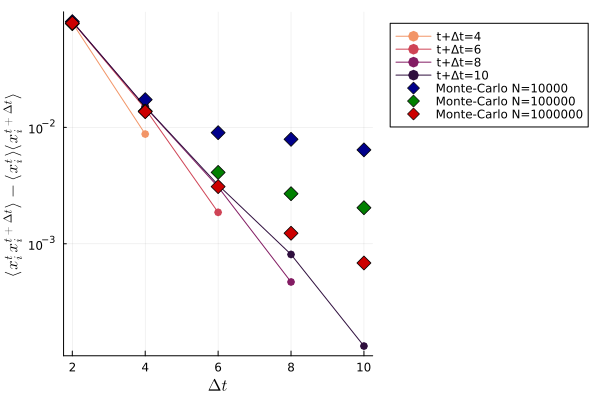

In [60]:
plot_autocovs(args...; kw...) = plot_autocovs!(plot(), args...; kw...)
function plot_autocovs!(pl, c; skip_even=false, T=size(c,1)-1, us = 0:(2*floor(Int, T/10)):T, kw...)
    step = skip_even ? 2 : 1
    cg = cgrad(:matter, length(us)+1, categorical=true)
    ylabel = L"\langle x_{i}^t x_{i}^{t+\Delta t}\rangle-" * 
        L"\langle x_{i}^t\rangle\langle x_{i}^{t+\Delta t}\rangle"
    xlabel = L"\Delta t"
    plot!(pl; xlabel, ylabel, legend=:outertopright)
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[1:step:u,u+1], label="t+Δt=$u", c=cg[j+1], msc=:auto; kw...) 
    end
    pl
end
plot_autocovs(c_avg; skip_even=true, m=:o, us=4:2:T, yaxis=:log)

col = cgrad(:darktest, length(nsamp), categorical=true)
for (k,N) in enumerate(nsamp)
    plot!(T:-2:2, autocorr_mc[k][1:2:end-1], st=:scatter, marker=:diamond, color=col[k], markersize=7, label="Monte-Carlo N=$N")
end

plot!()
# plot_autocovs(c_avg; skip_even=false, m=:o, us=4:2:T)
# plot!(T:-1:2, autocorr_mc[1:1:end-1], st=:scatter, marker=:diamond, color=:black, markersize=7, label="Monte-Carlo")

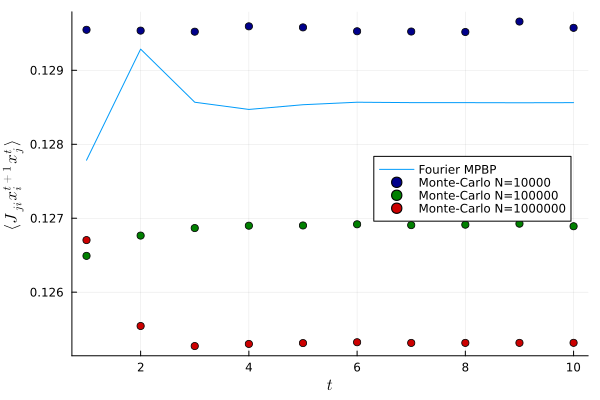

In [61]:
plot(c2_avg; xlabel=L"t", ylabel=L"\langle J_{ji} x_i^{t+1} x_j^t \rangle", label="Fourier MPBP", legend=:right)#, ylims=(0.1,0.2))

for (k,N) in enumerate(nsamp)
    plot!(energy_mc[k]; label="Monte-Carlo N=$N", st=:scatter, marker=:dot, color=col[k])
end

plot!()